Temperature Forecast Project using ML

Problem Statement:
    
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [45]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing data
df= pd.read_csv('temperature.csv')

In [4]:
#checking dataset
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
#checking shape og data
df.shape

(7752, 25)

In [6]:
#checking for nul values in the dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
#checking the data types of variables
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
#checking information of adata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [9]:
#describe the data to check some more details for ananlysis
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [10]:
#checking the unique value counts for station variable
df['station'].value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

In [11]:
#splittibg the date data into day month year
df['day'],df['month'],df['year'] = df['Date'].str.split('-',3).str

In [12]:
#droping the data
df.drop(columns=['Date'],inplace=True)

In [13]:
#filling the nan values in the dataset
df.fillna(df.mean(), inplace=True)

In [14]:
#checking for null value after cleaning the data
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 2
month               2
year                2
dtype: int64

In [15]:
#checking the value counts for day column
df['day'].value_counts

<bound method IndexOpsMixin.value_counts of 0        30
1        30
2        30
3        30
4        30
       ... 
7747     30
7748     30
7749     30
7750    NaN
7751    NaN
Name: day, Length: 7752, dtype: object>

In [16]:
#dropping some indexes because of nun values which are not filled
df = df.drop(index=[7750,7751])

In [17]:
#chcecking the null values again
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
month               0
year                0
dtype: int64

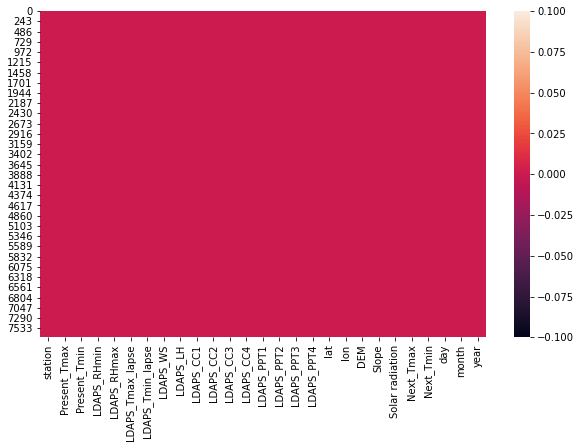

In [18]:
#plotting the heatmap for checking the null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

In [19]:
#displaying all the columns in the dataset
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

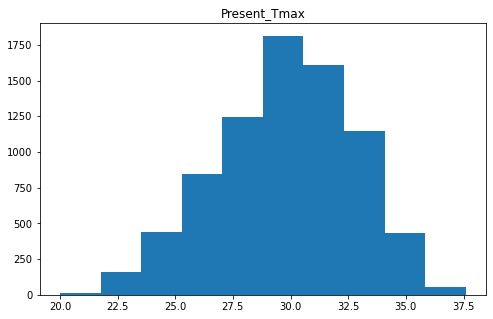

In [20]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('Present_Tmax')
plt.hist(df['Present_Tmax'])
plt.show()

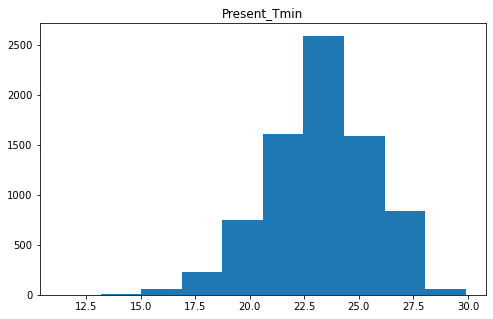

In [21]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('Present_Tmin')
plt.hist(df['Present_Tmin'])
plt.show()

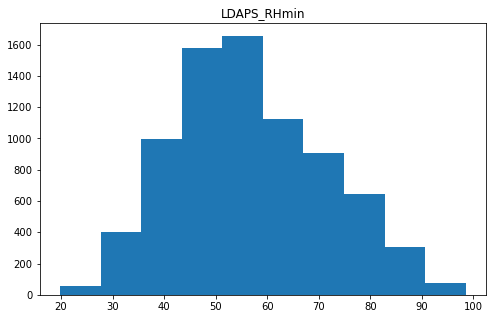

In [22]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_RHmin')
plt.hist(df['LDAPS_RHmin'])
plt.show()

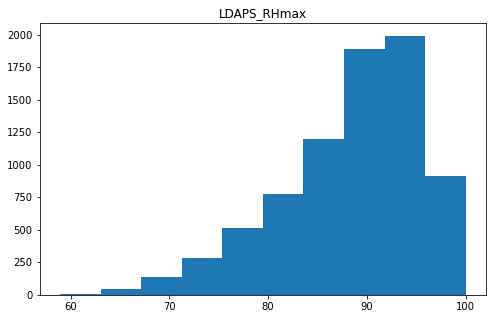

In [23]:
plt.figure(figsize=(8,5))
plt.title('LDAPS_RHmax')
plt.hist(df['LDAPS_RHmax'])
plt.show()

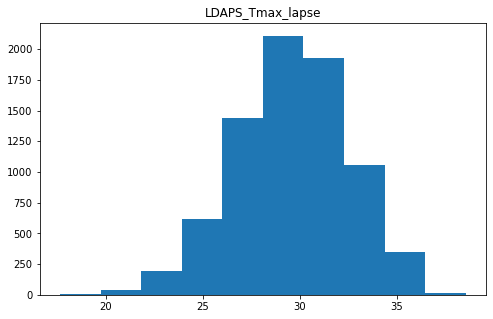

In [24]:

#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_Tmax_lapse')
plt.hist(df['LDAPS_Tmax_lapse'])
plt.show()

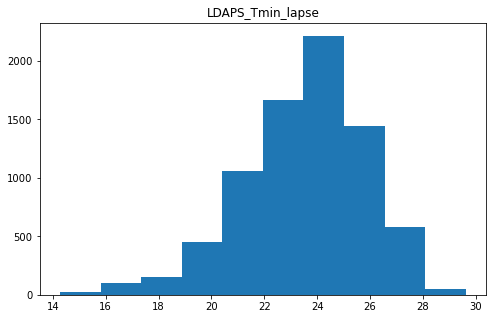

In [25]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_Tmin_lapse')
plt.hist(df['LDAPS_Tmin_lapse'])
plt.show()

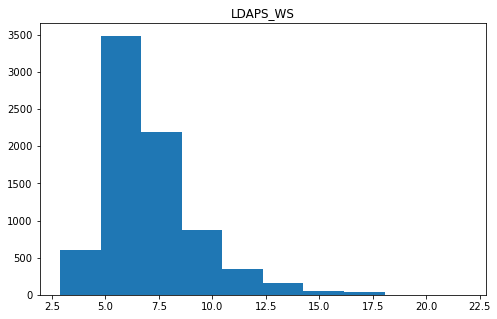

In [26]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_WS')
plt.hist(df['LDAPS_WS'])
plt.show()

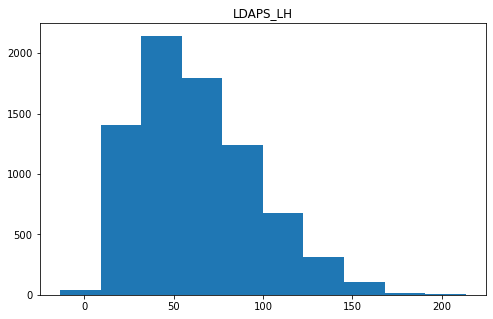

In [27]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_LH')
plt.hist(df['LDAPS_LH'])
plt.show()

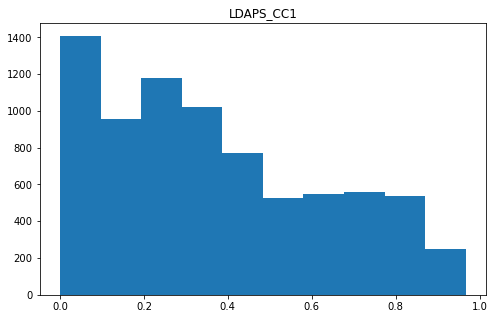

In [28]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_CC1')
plt.hist(df['LDAPS_CC1'])
plt.show()

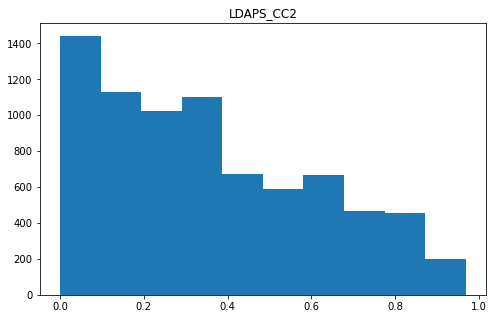

In [29]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_CC2')
plt.hist(df['LDAPS_CC2'])
plt.show()

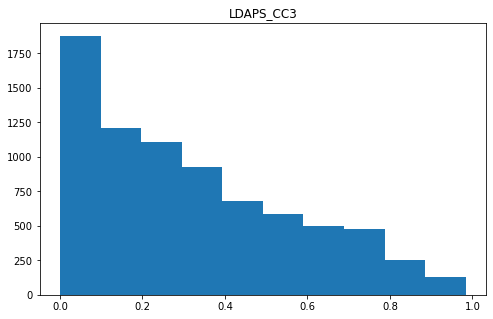

In [30]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_CC3')
plt.hist(df['LDAPS_CC3'])
plt.show()

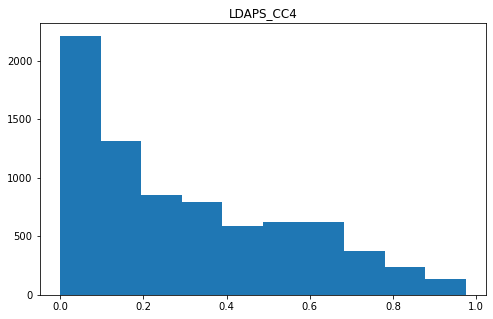

In [31]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_CC4')
plt.hist(df['LDAPS_CC4'])
plt.show()

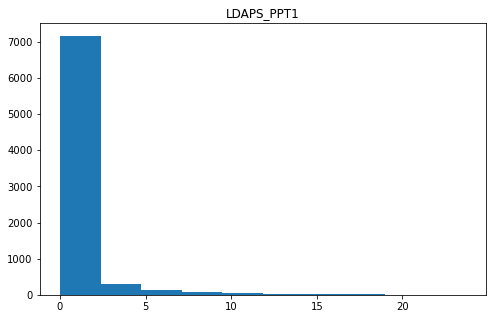

In [32]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_PPT1')
plt.hist(df['LDAPS_PPT1'])
plt.show()

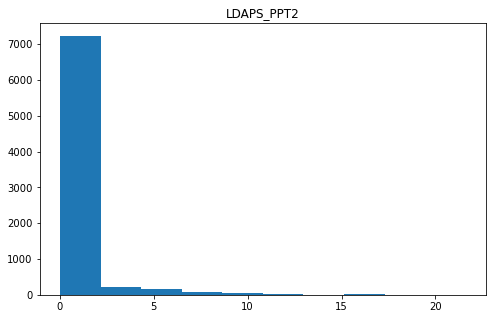

In [33]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_PPT2')
plt.hist(df['LDAPS_PPT2'])
plt.show()

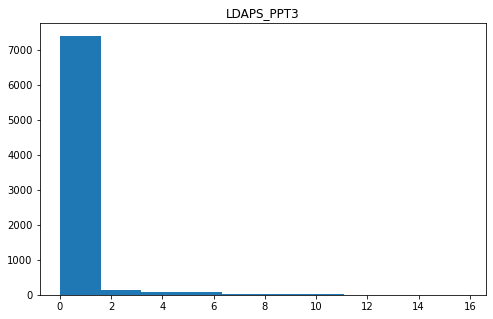

In [34]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_PPT3')
plt.hist(df['LDAPS_PPT3'])
plt.show()

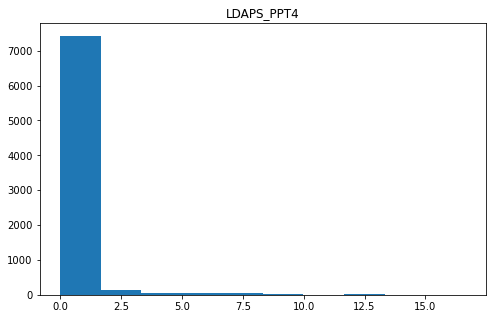

In [35]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('LDAPS_PPT4')
plt.hist(df['LDAPS_PPT4'])
plt.show()

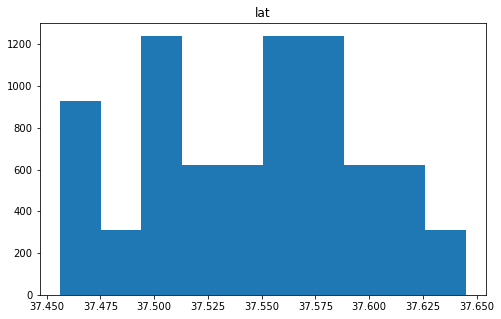

In [36]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('lat')
plt.hist(df['lat'])
plt.show()

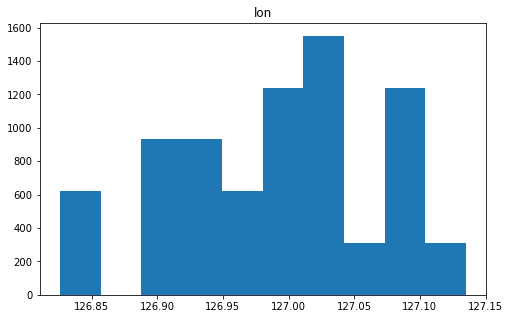

In [37]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('lon')
plt.hist(df['lon'])
plt.show()

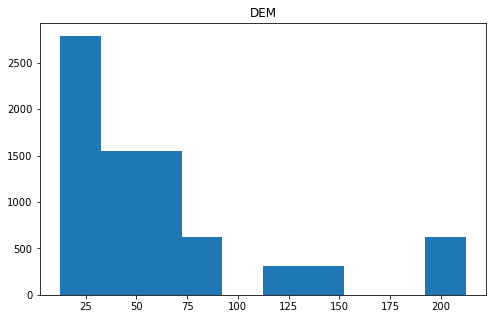

In [38]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('DEM')
plt.hist(df['DEM'])
plt.show()

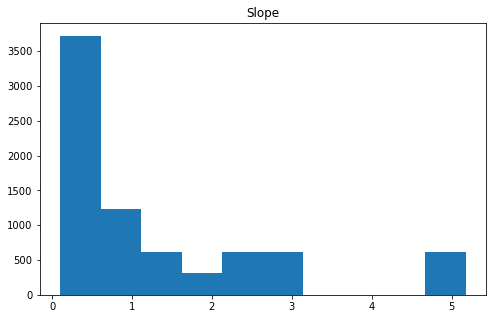

In [39]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('Slope')
plt.hist(df['Slope'])
plt.show()

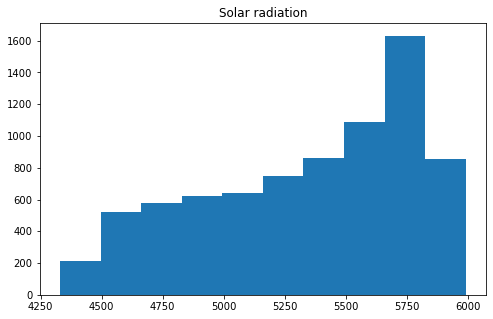

In [40]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('Solar radiation')
plt.hist(df['Solar radiation'])
plt.show()

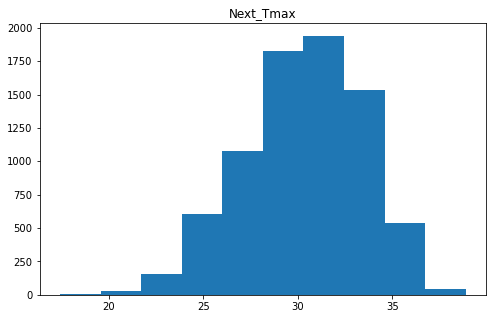

In [41]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('Next_Tmax')
plt.hist(df['Next_Tmax'])
plt.show()

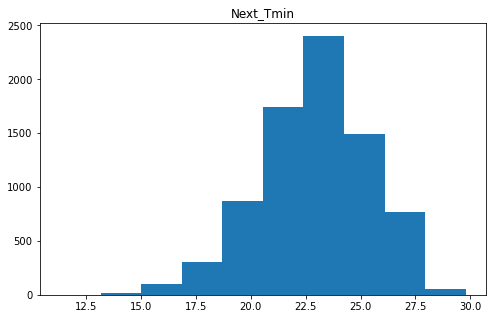

In [42]:
#plotting the chart for independent variables and checking the skewness in the data
plt.figure(figsize=(8,5))
plt.title('Next_Tmin')
plt.hist(df['Next_Tmin'])
plt.show()

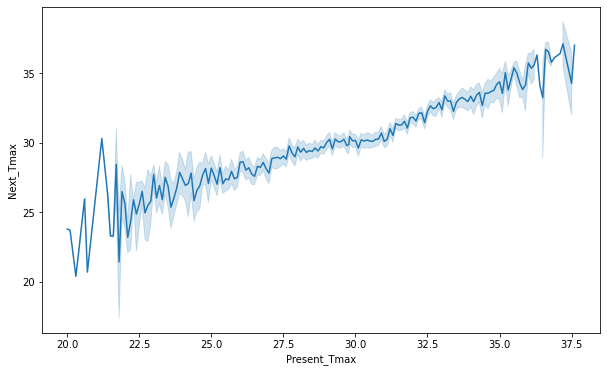

In [43]:
#checking the relationship between present tmax and next tmax
plt.figure(figsize=(10,6))
sns.lineplot(x='Present_Tmax', y='Next_Tmax', data=df )
plt.show()

present tmax and next tmax are correlated with each other.

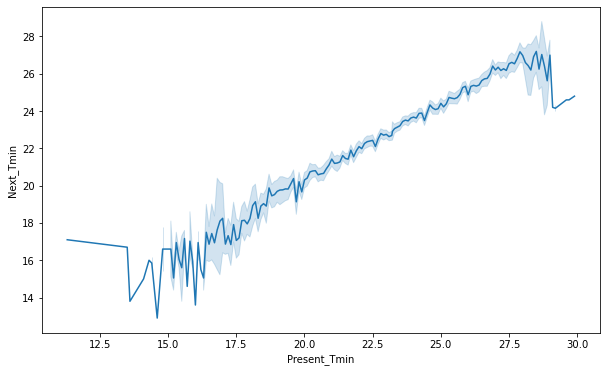

In [44]:
#checking the relationship between both targeted variables
plt.figure(figsize=(10,6))
sns.lineplot(x='Present_Tmin', y='Next_Tmin', data=df )
plt.show()

present tmin and next tmain are correlated with each other. 

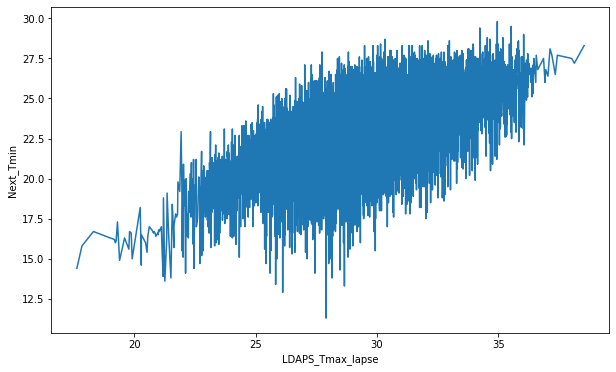

In [44]:
#checking the relationship between variables
plt.figure(figsize=(10,6))
sns.lineplot(x='LDAPS_Tmax_lapse', y='Next_Tmin', data=df )
plt.show()

LDAPS_Tmax_lapse and targeted column tmin are also correlated.

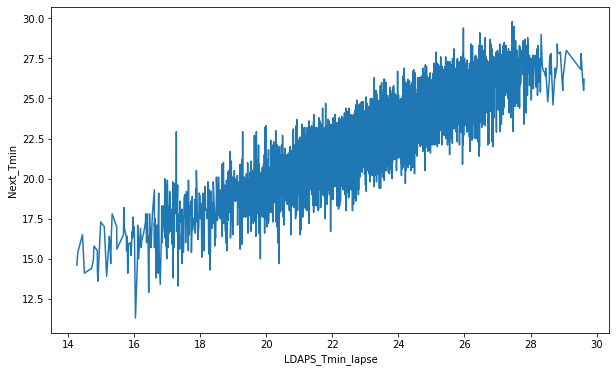

In [45]:
#checking the relationship between independent variables
plt.figure(figsize=(10,6))
sns.lineplot(x='LDAPS_Tmin_lapse', y='Next_Tmin', data=df )
plt.show()

LDAPS_Tmin_lapse and next tmin are also corelated with each others

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

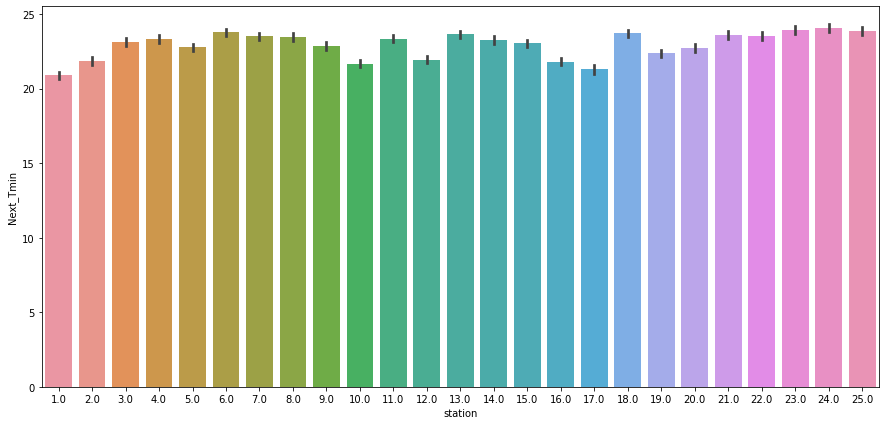

In [46]:
#checking the relationship between variables
plt.figure(figsize=(15,7))
sns.barplot(x='station', y='Next_Tmin', data=df)
plt.show

<AxesSubplot:xlabel='day', ylabel='Next_Tmin'>

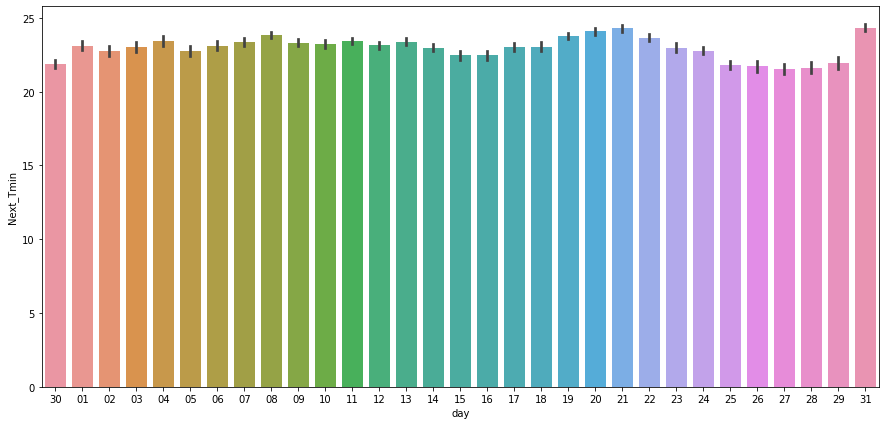

In [47]:
#checking the relationship between variables
plt.figure(figsize=(15,7))
sns.barplot(x='day', y='Next_Tmin', data=df)

<AxesSubplot:xlabel='month', ylabel='Next_Tmin'>

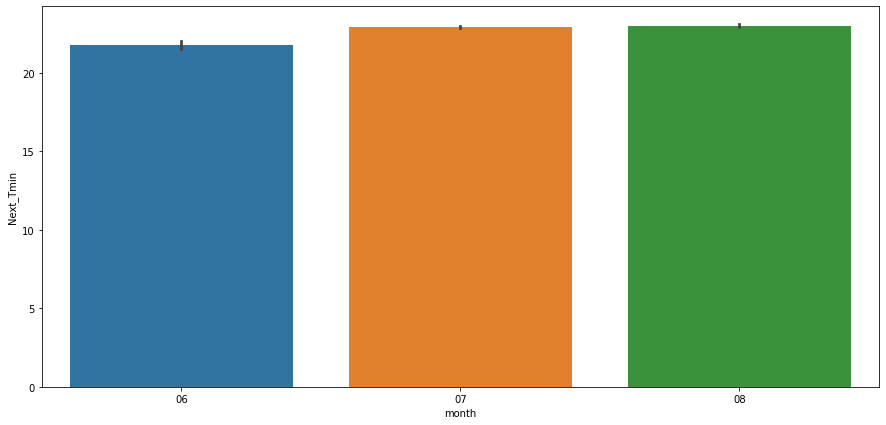

In [48]:
#checking the relationship between variables
plt.figure(figsize=(15,7))
sns.barplot(x='month', y='Next_Tmin', data=df)

<AxesSubplot:xlabel='year', ylabel='Next_Tmin'>

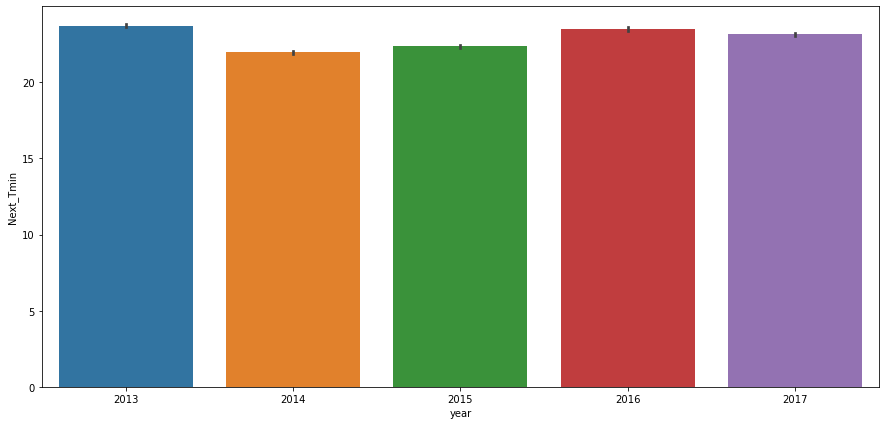

In [49]:
#checking the relationship between variables
plt.figure(figsize=(15,7))
sns.barplot(x='year', y='Next_Tmin', data=df)

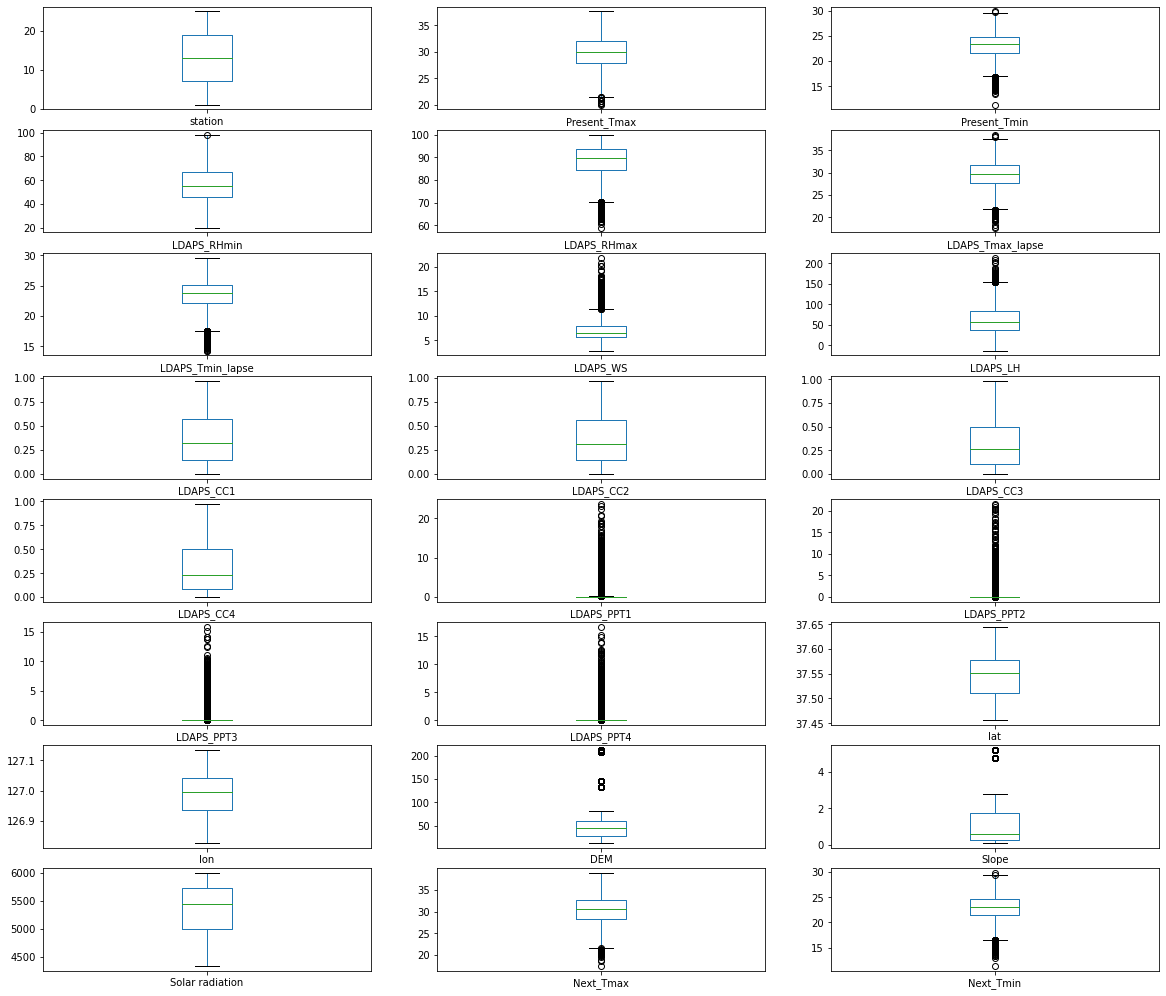

In [50]:
#plotting the boxplots wo check the outliers
df.plot(kind='box',subplots=True,layout=(9,3),figsize=(20,20));

<AxesSubplot:>

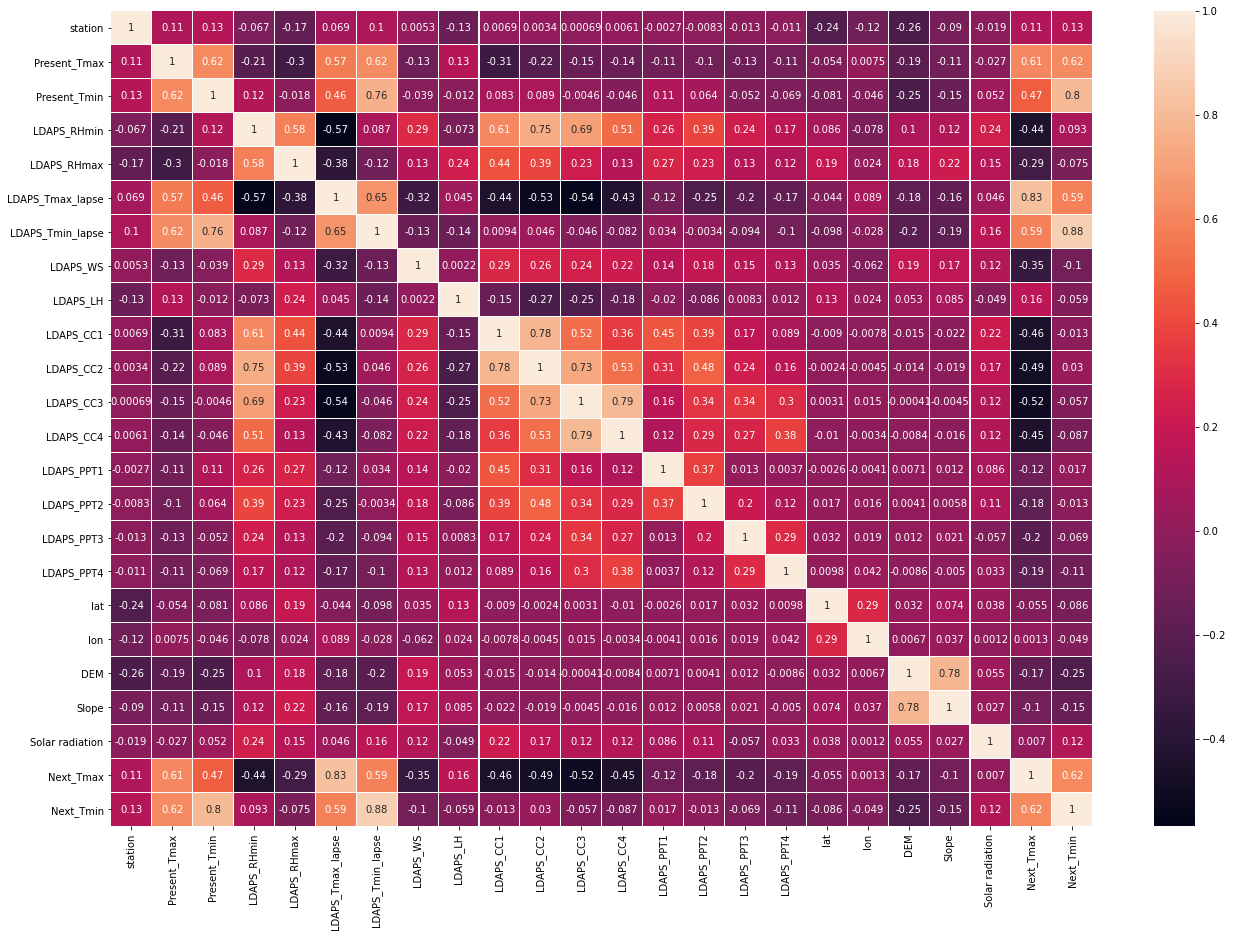

In [51]:
#correlating data by making the heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.1)

<AxesSubplot:>

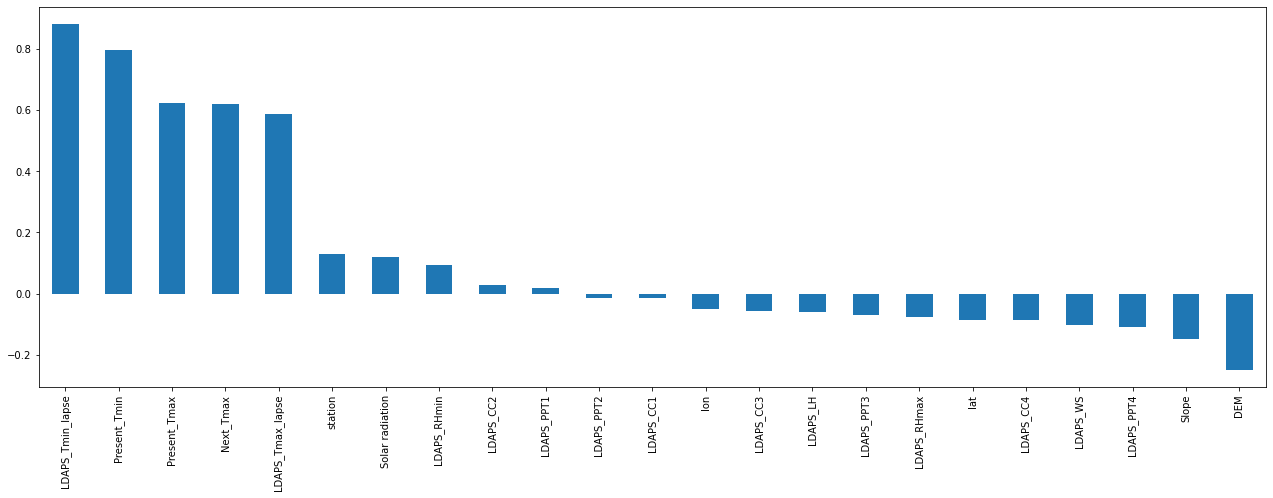

In [52]:
# correlating the targeted variables
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop('Next_Tmin').plot(kind='bar')

LDPAPS_T_min_lapse is much correlated with minimum airquality

In [53]:
#checking informantion of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7750 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7750 non-null   float64
 2   Present_Tmin      7750 non-null   float64
 3   LDAPS_RHmin       7750 non-null   float64
 4   LDAPS_RHmax       7750 non-null   float64
 5   LDAPS_Tmax_lapse  7750 non-null   float64
 6   LDAPS_Tmin_lapse  7750 non-null   float64
 7   LDAPS_WS          7750 non-null   float64
 8   LDAPS_LH          7750 non-null   float64
 9   LDAPS_CC1         7750 non-null   float64
 10  LDAPS_CC2         7750 non-null   float64
 11  LDAPS_CC3         7750 non-null   float64
 12  LDAPS_CC4         7750 non-null   float64
 13  LDAPS_PPT1        7750 non-null   float64
 14  LDAPS_PPT2        7750 non-null   float64
 15  LDAPS_PPT3        7750 non-null   float64
 16  LDAPS_PPT4        7750 non-null   float64


In [54]:
#drop some unnecessory data
df.drop(['day','month','year'],axis=1,inplace=True)

In [55]:
#checking the old shape of dataframe
df.shape

(7750, 24)

In [56]:
#checking the skewness in the adta
df.skew()

station             0.000000
Present_Tmax       -0.263013
Present_Tmin       -0.357565
LDAPS_RHmin         0.300229
LDAPS_RHmax        -0.850657
LDAPS_Tmax_lapse   -0.224207
LDAPS_Tmin_lapse   -0.579033
LDAPS_WS            1.556422
LDAPS_LH            0.667582
LDAPS_CC1           0.459193
LDAPS_CC2           0.471965
LDAPS_CC3           0.640088
LDAPS_CC4           0.665829
LDAPS_PPT1          5.324404
LDAPS_PPT2          5.713247
LDAPS_PPT3          6.368693
LDAPS_PPT4          6.743231
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.335956
Next_Tmin          -0.396873
dtype: float64

In [57]:
#using zscore to sizing rthe data
from scipy.stats import zscore

zscore= abs(zscore(df))
print(df.shape)

(7750, 24)


In [58]:
#checking new dataframe after re,pving outliers
df_new=df.loc[(zscore<3).all(axis=1)]
print(df_new.shape)

(6888, 24)


In [59]:
#checking how much data we have left after remove some
print('percentage data left is ',(6888/7750)*100,'%')

percentage data left is  88.87741935483871 %


In [60]:
#again cheking for skewness after doin some cleaning
df_new.skew()

station             0.002824
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.687967
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.382885
LDAPS_WS            1.088575
LDAPS_LH            0.569060
LDAPS_CC1           0.595343
LDAPS_CC2           0.501691
LDAPS_CC3           0.700518
LDAPS_CC4           0.711008
LDAPS_PPT1          3.723069
LDAPS_PPT2          4.859920
LDAPS_PPT3          5.479300
LDAPS_PPT4          5.926613
lat                 0.108039
lon                -0.275324
DEM                 1.765466
Slope               1.595105
Solar radiation    -0.505080
Next_Tmax          -0.268494
Next_Tmin          -0.238379
dtype: float64

In [61]:
#splitting the targeted variables
x= df_new.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y1= df_new['Next_Tmax']
y2= df_new['Next_Tmin']

In [62]:
#importing library and scalling the data
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
sc.fit_transform(x)
x= pd.DataFrame(x,columns=x.columns)

In [120]:
#importing some more usefull libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [105]:
#checking for r2 score and making the base for analysis
def maxr2_score(lr,x,y):
    max_r_score=0
    lr=LinearRegression()
    for r_state in range(1,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.25)
        lr.fit(x_train,y_train)
        pred = lr.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score is ',max_r_score)
    return final_r_state

In [106]:
#cross validation of result
def cross_val(model,x,y):
    cv=cross_val_score(model,x,y,cv=5)
    print('cross validation score is ',cv.mean())  

In [107]:
# using decision tree model to getting accuracy score
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr_score = maxr2_score(dtr,x,y1)

max r2 score is  0.7652654612814724


In [108]:
#cross validation of decision tree
cross_val(dtr,x,y1)

cross validation score is  0.4112209030926978


In [109]:
#using knerest neighbors model to getting accuracy score
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn_score = maxr2_score(knn,x,y1)

max r2 score is  0.7652654612814724


In [110]:
#cross validating the result
cross_val(dtr,x,y1)

cross validation score is  0.41570629118198105


In [111]:
#using support vector model to get the accuracy score
from sklearn.svm import SVR

svr= SVR()
svr_score = maxr2_score(knn,x,y1)

max r2 score is  0.7652654612814724


In [112]:
#cross validating the data
cross_val(svr,x,y1)

cross validation score is  -0.11246798799106308


In [113]:
#using random forest regressor to ger tge r2 score
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor
rf_score= maxr2_score(rf,x,y1)

max r2 score is  0.7652654612814724


In [118]:
#using ada boost regressor to get the mac r3 score
from sklearn.ensemble import AdaBoostRegressor

ad =AdaBoostRegressor
ad_score=maxr2_score(ad,x,y1)

max r2 score is  0.7652654612814724


In [139]:
#hyperperameter tunning the best result to get more accuracy and parameter
rf=RandomForestRegressor()
parameters = {'n_estimators':[1,10,50]}
gs = GridSearchCV(rf, parameters, cv=5)
gs.fit(x,y1)
gs.best_params_

{'n_estimators': 50}

In [141]:
#using train test split to get the best prediction scores
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.25,random_state=74)
rf = RandomForestRegressor(n_estimators=500)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
print("mean absolute error :",mean_absolute_error(y_test,pred))

r2 score : 0.8787898894951586
mean squared error : 1.024544066913622
mean absolute error : 0.7608628547372874


# Saving the model and predicting the temperature

In [142]:
#saving the model
import joblib
joblib.dump(rf,'next_Tmax.pkl')

['next_Tmax.pkl']

In [143]:
#loading the mode for prediction
model = joblib.load('next_Tmax.pkl')

In [145]:
#loading the data
pred = model.predict(x_test)

In [149]:
#putting the model in the data
pred= pd.DataFrame(prediction)
pred.to_csv('Result.csv')

In [150]:
#final prediction of the temperature 
pred

,0
0,30.375350
1,31.324550
2,30.047800
3,28.875100
4,32.810800
...,...
1717,34.166700
1718,25.836998
1719,31.490000
1720,29.792600


# predicting the temperature with tmin

In [151]:
#using random forest regressor to getting the r2 score
rf= RandomForestRegressor
rf_score= maxr2_score(rf,x,y2)

max r2 score is  0.8327492578146247


In [153]:
#tunning the data
rf=RandomForestRegressor()
parameters = {'n_estimators':[1,10,50]}

gs = GridSearchCV(rf, parameters, cv=5)
gs.fit(x,y2)
gs.best_params_

{'n_estimators': 50}

In [166]:
#using train test split to get the best prediction scorw
x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size=0.25,random_state=80)
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
print("mean absolute error :",mean_absolute_error(y_test,pred))

r2 score : 0.8914350079265666
mean squared error : 0.773955939625331
mean absolute error : 0.5933680761062812


In [167]:
#saving the second model
joblib.dump(rf,'next_Tmin.pkl')

['next_Tmin.pkl']